# Basic Operations and Dataset uploading from Kaggle

In [35]:
import pandas as pd
import json

# Load JSON file
with open("kaggle.json") as f:
    data = json.load(f)

# Convert to DataFrame
df = pd.DataFrame([data])  # Wrap in a list to make it 2D

print(df.head())


      username                               key
0  rnrahate007  19394d9d8405b73556f804fd7e2e20d3


In [36]:
import os
import shutil

# Create the .kaggle folder
os.makedirs(os.path.expanduser("~/.kaggle"), exist_ok=True)

# Copy kaggle.json to that folder
shutil.copy("kaggle.json", os.path.expanduser("~/.kaggle/kaggle.json"))


'C:\\Users\\Asus/.kaggle/kaggle.json'

In [37]:
!kaggle datasets download -d redwankarimsony/heart-disease-data -p heart-disease --unzip

Dataset URL: https://www.kaggle.com/datasets/redwankarimsony/heart-disease-data
License(s): copyright-authors




  0%|          | 0.00/12.4k [00:00<?, ?B/s]
100%|##########| 12.4k/12.4k [00:00<00:00, 13.8MB/s]


In [38]:
import pandas as pd

df = pd.read_csv("heart-disease/heart_disease_uci.csv")  # Make sure the file is in the same directory as the notebook
df.head()


,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,1,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,2,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2
2,3,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,4,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,5,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0


In [39]:
df.shape

(920, 16)

In [40]:
df.columns

Index(['id', 'age', 'sex', 'dataset', 'cp', 'trestbps', 'chol', 'fbs',
       'restecg', 'thalch', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'num'],
      dtype='object')

In [41]:
df.isnull().sum()

id            0
age           0
sex           0
dataset       0
cp            0
trestbps     59
chol         30
fbs          90
restecg       2
thalch       55
exang        55
oldpeak      62
slope       309
ca          611
thal        486
num           0
dtype: int64

In [42]:
numeric_cols = df.select_dtypes(include='number').columns
df[numeric_cols] = df[numeric_cols].fillna(df[numeric_cols].mean())

In [43]:
df[numeric_cols]

,id,age,trestbps,chol,thalch,oldpeak,ca,num
0,1,63,145.000000,233.0,150.000000,2.300000,0.000000,0
1,2,67,160.000000,286.0,108.000000,1.500000,3.000000,2
2,3,67,120.000000,229.0,129.000000,2.600000,2.000000,1
3,4,37,130.000000,250.0,187.000000,3.500000,0.000000,0
4,5,41,130.000000,204.0,172.000000,1.400000,0.000000,0
...,...,...,...,...,...,...,...,...
915,916,54,127.000000,333.0,154.000000,0.000000,0.676375,1
916,917,62,132.132404,139.0,137.545665,0.878788,0.676375,0
917,918,55,122.000000,223.0,100.000000,0.000000,0.676375,2
918,919,58,132.132404,385.0,137.545665,0.878788,0.676375,0


In [44]:
import matplotlib.pyplot as plt
import seaborn as sb

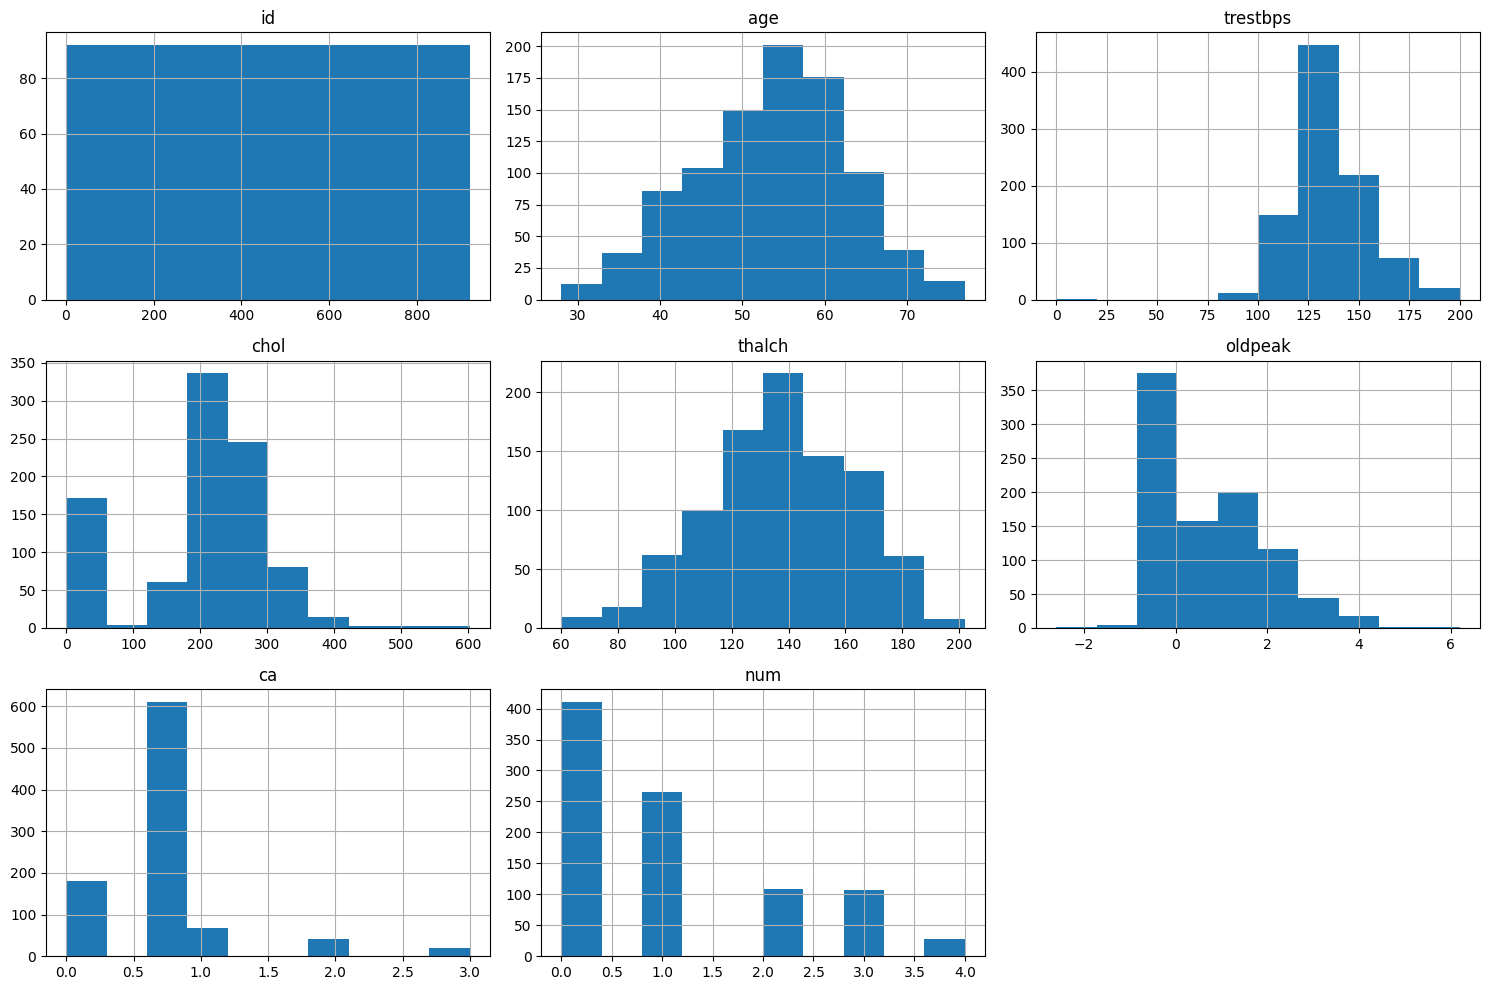

In [45]:
df[numeric_cols].hist(figsize=(15,10))
plt.tight_layout()
plt.show()

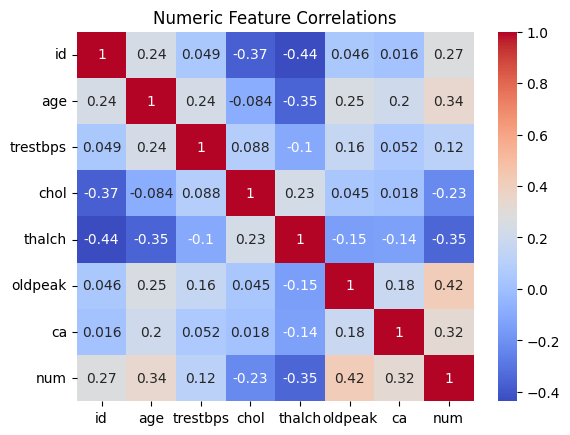

In [46]:
sb.heatmap(df[numeric_cols].corr(),annot=True, cmap='coolwarm')
plt.title('Numeric Feature Correlations')
plt.show()

# Model Training

In [47]:
cat_cols = df.select_dtypes(include='object').columns.tolist() 
if 'num' in cat_cols:
    cat_cols.remove('num')
    

In [48]:
X = df.drop('num',axis=1)
Y = (df['num']>0).astype(int)

In [49]:
X = pd.get_dummies(X, columns=cat_cols) # One-hot encoding: converts each categorical column into multiple binary columns (0/1) for model processing
print(f"Final feature columns: {X.columns}") 

Final feature columns: Index(['id', 'age', 'trestbps', 'chol', 'thalch', 'oldpeak', 'ca',
       'sex_Female', 'sex_Male', 'dataset_Cleveland', 'dataset_Hungary',
       'dataset_Switzerland', 'dataset_VA Long Beach', 'cp_asymptomatic',
       'cp_atypical angina', 'cp_non-anginal', 'cp_typical angina',
       'fbs_False', 'fbs_True', 'restecg_lv hypertrophy', 'restecg_normal',
       'restecg_st-t abnormality', 'exang_False', 'exang_True',
       'slope_downsloping', 'slope_flat', 'slope_upsloping',
       'thal_fixed defect', 'thal_normal', 'thal_reversable defect'],
      dtype='object')


# Train/Test split, Normalization, Modelling and Model Evaluation

In [52]:
from sklearn.model_selection import train_test_split # Modelling
from sklearn.preprocessing import StandardScaler

In [55]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [57]:
# new_value = (x-mean)/standard deviation [Z-Score for standardization]

In [58]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [60]:
from sklearn.linear_model import LogisticRegression # used to classify wheather patient will be diagnosed positive or negative based on input factors(age,gender,bp,sugar,blood cholestrol,etc)

In [63]:
lr_model = LogisticRegression() 
lr_model.fit(X_train_scaled, Y_train) # training step

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [79]:
from sklearn.metrics import accuracy_score,classification_report # Model evaluation

In [84]:
Y_pred_lr = lr_model.predict(X_test_scaled)
print("Logistic Regression Accuracy: ", accuracy_score(Y_test, Y_pred_lr)*100, '%')
print(classification_report(Y_test, Y_pred_lr))

Logistic Regression Accuracy:  84.23913043478261 %
              precision    recall  f1-score   support

           0       0.79      0.83      0.81        75
           1       0.88      0.85      0.87       109

    accuracy                           0.84       184
   macro avg       0.84      0.84      0.84       184
weighted avg       0.84      0.84      0.84       184

